In [54]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 엑셀 데이터 불러오기
df = pd.read_excel('LgChem_40yrs.xlsx')

In [4]:
df

,Ticker Symbol,Data Year - Fiscal,R&D Margin,Net Margin,Asset Turnover,Equity Multiplier,BV leverage,ROE,Cash Dividends (Cash Flow) in KRW,FCFF in KRW,FCFE in KRW
0,PCRFY,1980,0.034795,0.042724,1.568371,2.320377,1.320377,0.155482,6.162632e+04,1.564698e+04,1.372385e+04
1,PCRFY,1981,0.036943,0.045411,1.342110,2.268758,1.268758,0.138273,6.683331e+04,5.415835e+05,4.124082e+05
2,PCRFY,1982,0.041420,0.043052,1.052818,2.310549,1.310549,0.104728,6.374400e+04,1.324948e+06,1.356873e+06
3,PCRFY,1983,0.043675,0.045819,1.384538,2.211166,1.211166,0.140271,7.407412e+04,1.411062e+06,1.391092e+06
4,PCRFY,1984,0.042392,0.050494,1.323225,2.153820,1.153820,0.143907,9.075841e+04,1.424152e+06,1.965942e+06
5,PCRFY,1985,0.047642,0.048775,1.466510,2.262142,1.262142,0.161810,9.288504e+04,1.278795e+06,1.406134e+06
6,PCRFY,1986,0.054677,0.035774,1.305479,2.117561,1.117561,0.098896,1.222709e+05,1.397588e+06,1.505999e+06
7,PCRFY,1987,0.056320,0.033790,1.437091,2.013815,1.013815,0.097789,1.458807e+05,8.309255e+05,2.533331e+06
8,PCRFY,1988,0.057979,0.038781,1.076641,1.954343,0.954343,0.081601,1.613027e+05,-2.047484e+06,5.489437e+05
9,PCRFY,1989,0.057586,0.039242,0.778434,2.233334,1.233334,0.068222,1.758727e+05,1.679907e+06,4.830077e+06


In [11]:
y_labels = df.columns[2:]

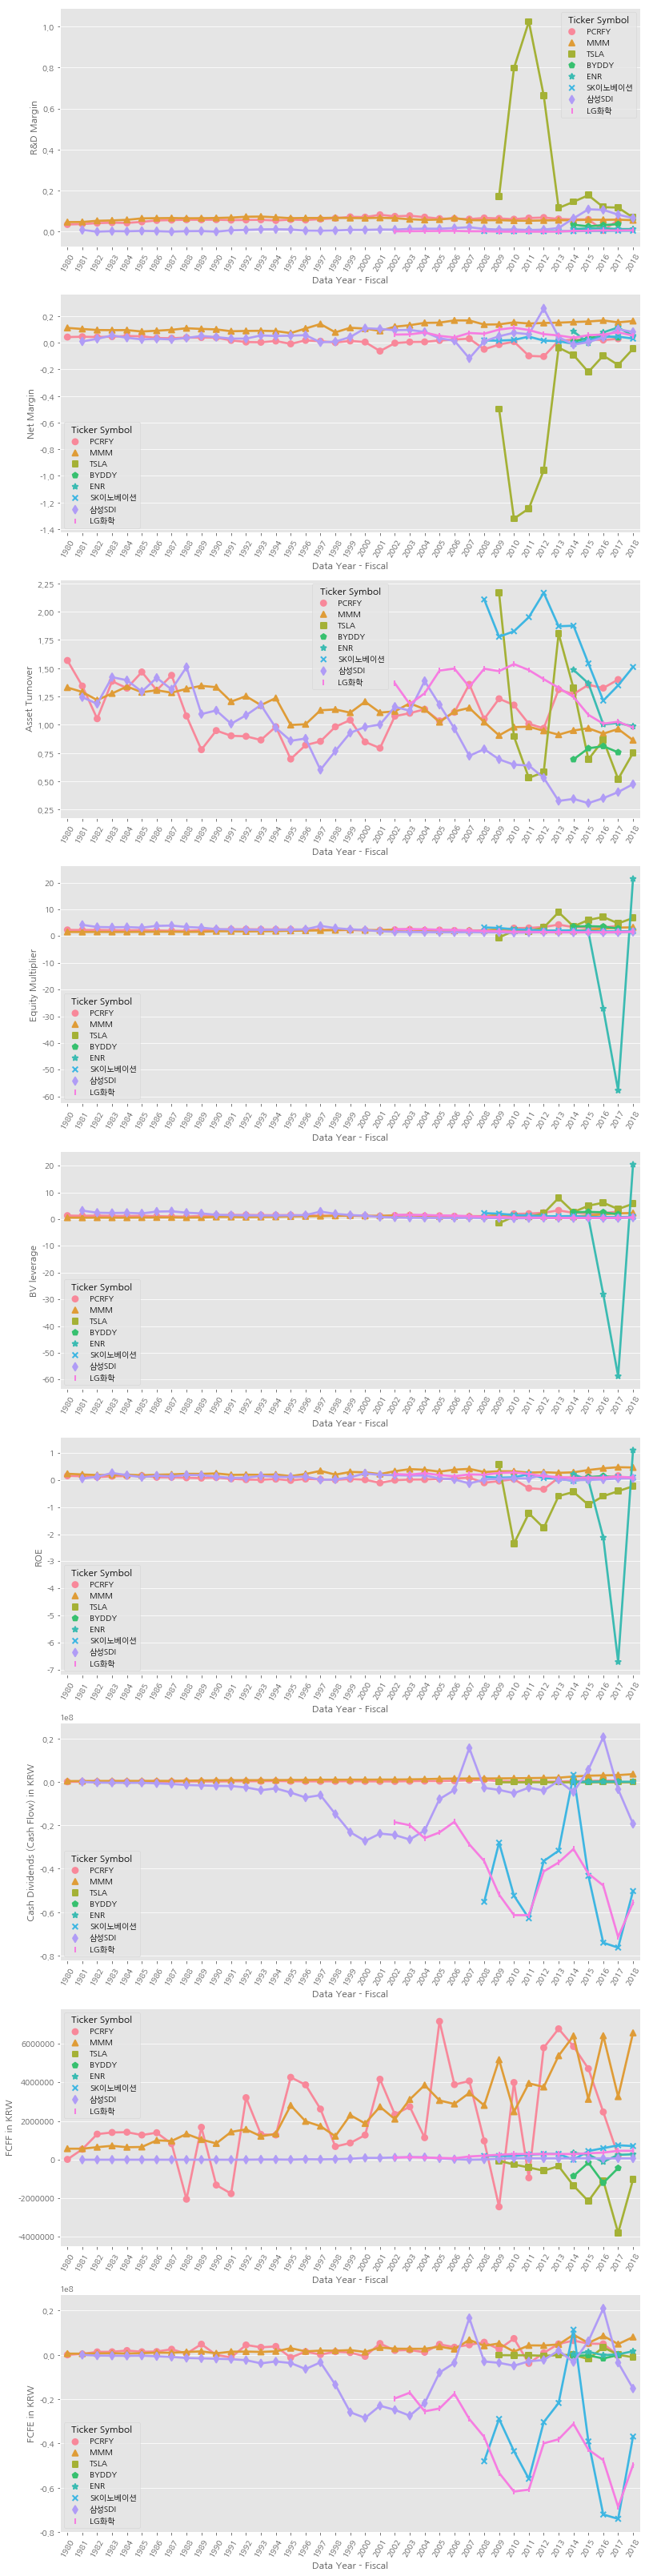

In [82]:
f, axes = plt.subplots(9, 1)
f.set_size_inches(13,58)

for index,label in enumerate(y_labels):
    sns.pointplot(data=df, x="Data Year - Fiscal", y=label, hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=axes[index])

for ax in axes:
    ax.tick_params(axis='x', rotation=60)
    
f.savefig('all_without_outlier_adjustment.png',bbox_inches="tight", pad_inches=0.1)

In [34]:
# 아웃라이어가 존재하는 'R&D Margin', 'Net Margin','Equity Multiplier','BV leverage', 'ROE', 는 
# y 축 tick 값을 어느정도 생략한 그래프로 다시 그려준다.

0.0 , 1.0232028671869644


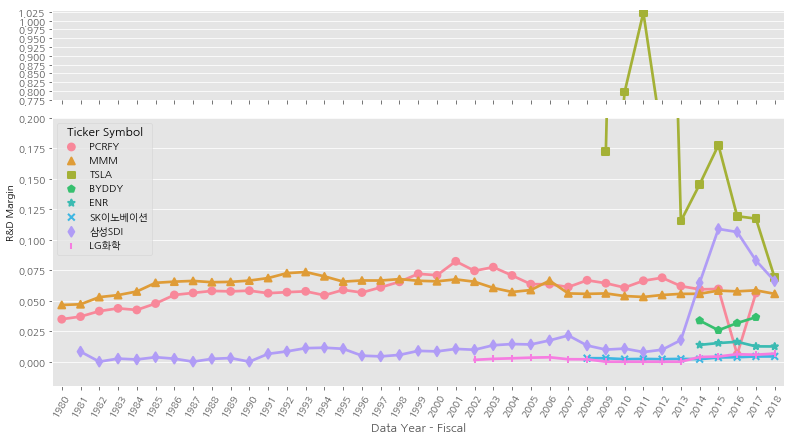

In [86]:
# R&D Margin

print(str(df['R&D Margin'].min()) + ' , ' + str(df['R&D Margin'].max()))

f, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]})
f.set_size_inches(11,6)

sns.pointplot(data=df, x="Data Year - Fiscal", y="R&D Margin", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax)
sns.pointplot(data=df, x="Data Year - Fiscal", y="R&D Margin", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax2)

ax.set_ylim(0.775, 1.03)  # outliers only
ax2.set_ylim(-0.02, .2)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop=False,labelbottom=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('')
ax2.set_ylabel('')

start, end = ax.get_ylim()
steps = ax2.get_yticks()
step = steps[2] - steps[1]
ax.yaxis.set_ticks(np.arange(start, end, step))

f.text(0, 0.5, 'R&D Margin', va='center', rotation='vertical')
plt.tight_layout()

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.xticks(rotation=60)

f.savefig('rd_margin.png',bbox_inches="tight", pad_inches=0.1)

-1.3219351743986842 , 0.2576272236336109


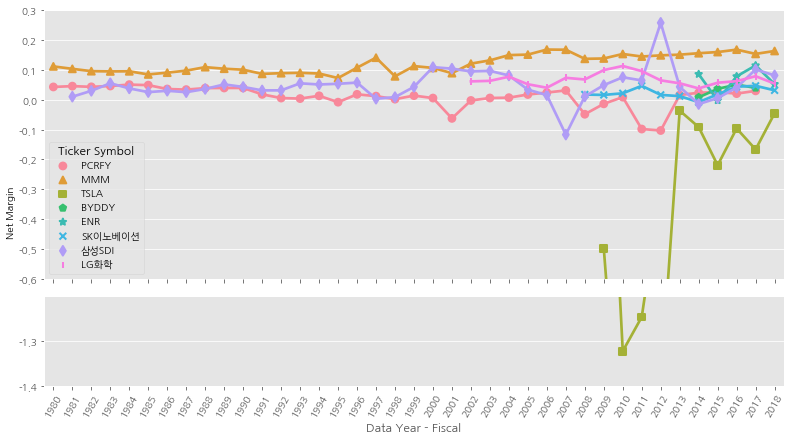

In [87]:
# Net Margin

print(str(df['Net Margin'].min()) + ' , ' + str(df['Net Margin'].max()))

f, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
f.set_size_inches(11,6)

sns.pointplot(data=df, x="Data Year - Fiscal", y="Net Margin", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax)
sns.pointplot(data=df, x="Data Year - Fiscal", y="Net Margin", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax2)

ax.set_ylim(-0.6, 0.3)  
ax2.set_ylim(-1.4, -1.2) # outliers only
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop=False,labelbottom=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('')
ax2.set_ylabel('')

start, end = ax2.get_ylim()
steps = ax.get_yticks()
step = steps[2] - steps[1]
ax2.yaxis.set_ticks(np.arange(start, end, step))

f.text(0, 0.5, 'Net Margin', va='center', rotation='vertical')
plt.tight_layout()

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.xticks(rotation=60)

f.savefig('net_margin.png',bbox_inches="tight", pad_inches=0.1)

-57.71666666666667 , 21.428907168037604


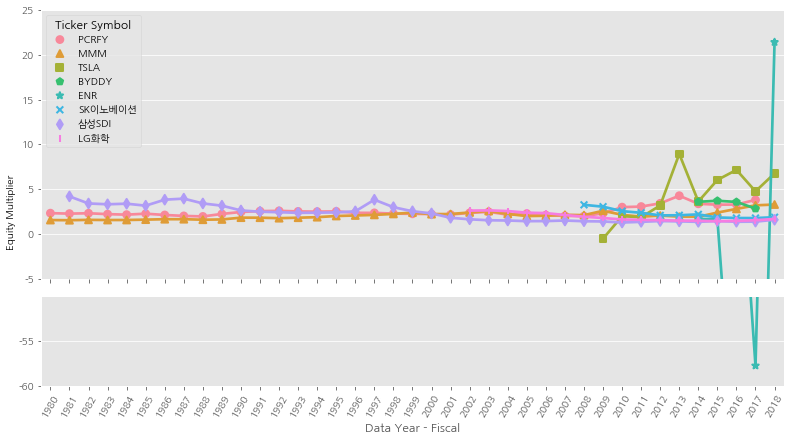

In [102]:
# Equity Multiplier

print(str(df['Equity Multiplier'].min()) + ' , ' + str(df['Equity Multiplier'].max()))

f, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
f.set_size_inches(11,6)

sns.pointplot(data=df, x="Data Year - Fiscal", y="Equity Multiplier", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax)
sns.pointplot(data=df, x="Data Year - Fiscal", y="Equity Multiplier", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax2)

ax.set_ylim(-5, 25)  
ax2.set_ylim(-60, -50) # outliers only
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop=False,labelbottom=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('')
ax2.set_ylabel('')

start, end = ax2.get_ylim()
steps = ax.get_yticks()
step = steps[2] - steps[1]
ax2.yaxis.set_ticks(np.arange(start, end, step))

f.text(0, 0.5, 'Equity Multiplier', va='center', rotation='vertical')
plt.tight_layout()

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.xticks(rotation=60)

f.savefig('equity_multiplier.png',bbox_inches="tight", pad_inches=0.1)

-57.71666666666667 , 20.428907168037604


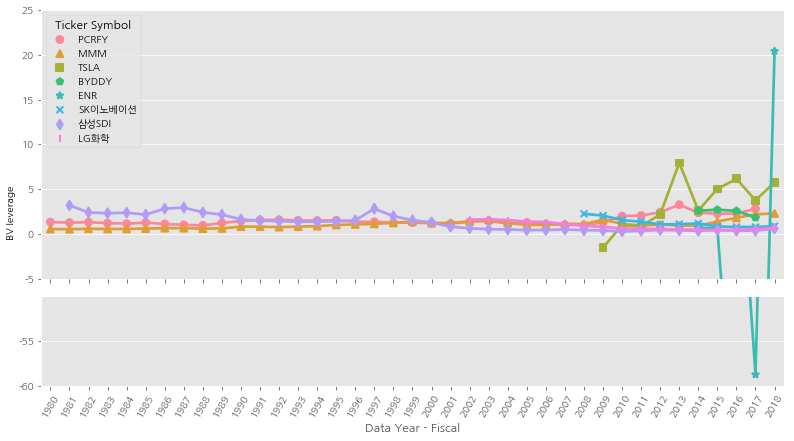

In [103]:
# BV leverage

print(str(df['Equity Multiplier'].min()) + ' , ' + str(df['BV leverage'].max()))

f, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
f.set_size_inches(11,6)

sns.pointplot(data=df, x="Data Year - Fiscal", y="BV leverage", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax)
sns.pointplot(data=df, x="Data Year - Fiscal", y="BV leverage", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax2)

ax.set_ylim(-5, 25)  
ax2.set_ylim(-60, -50) # outliers only
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop=False,labelbottom=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('')
ax2.set_ylabel('')

start, end = ax2.get_ylim()
steps = ax.get_yticks()
step = steps[2] - steps[1]
ax2.yaxis.set_ticks(np.arange(start, end, step))

f.text(0, 0.5, 'BV leverage', va='center', rotation='vertical')
plt.tight_layout()

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.xticks(rotation=60)

f.savefig('bv_leverage.png',bbox_inches="tight", pad_inches=0.1)

-6.716666666666668 , 1.0987074030552293


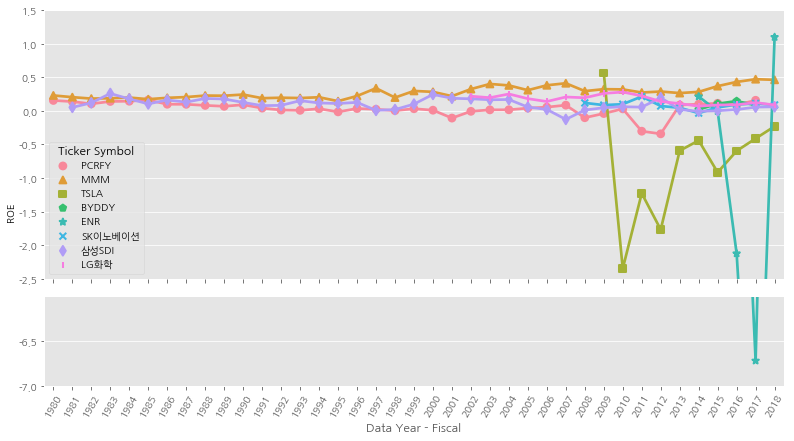

In [105]:
# ROE

print(str(df['ROE'].min()) + ' , ' + str(df['ROE'].max()))

f, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
f.set_size_inches(11,6)

sns.pointplot(data=df, x="Data Year - Fiscal", y="ROE", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax)
sns.pointplot(data=df, x="Data Year - Fiscal", y="ROE", hue="Ticker Symbol", markers=["o","^","s",'p','*','x','d','|'], ax=ax2)

ax.set_ylim(-2.5, 1.5)  
ax2.set_ylim(-7, -6) # outliers only
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop=False,labelbottom=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('')
ax2.set_ylabel('')

start, end = ax2.get_ylim()
steps = ax.get_yticks()
step = steps[2] - steps[1]
ax2.yaxis.set_ticks(np.arange(start, end, step))

f.text(0, 0.5, 'ROE', va='center', rotation='vertical')
plt.tight_layout()

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.xticks(rotation=60)

f.savefig('roe.png',bbox_inches="tight", pad_inches=0.1)